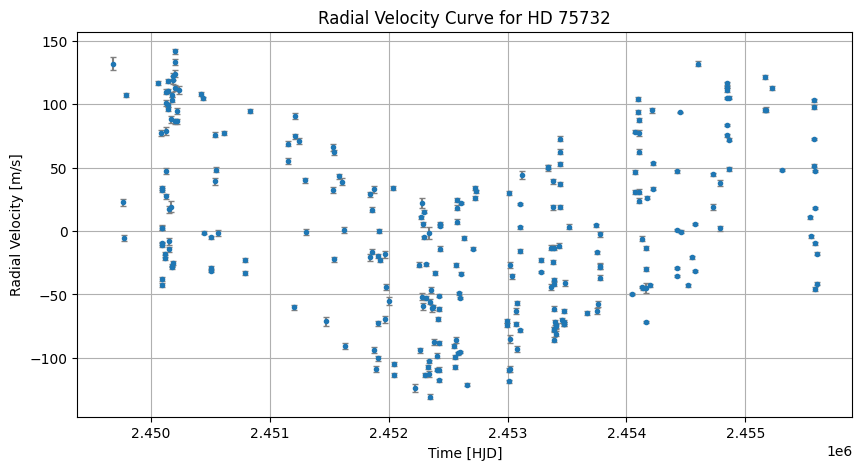

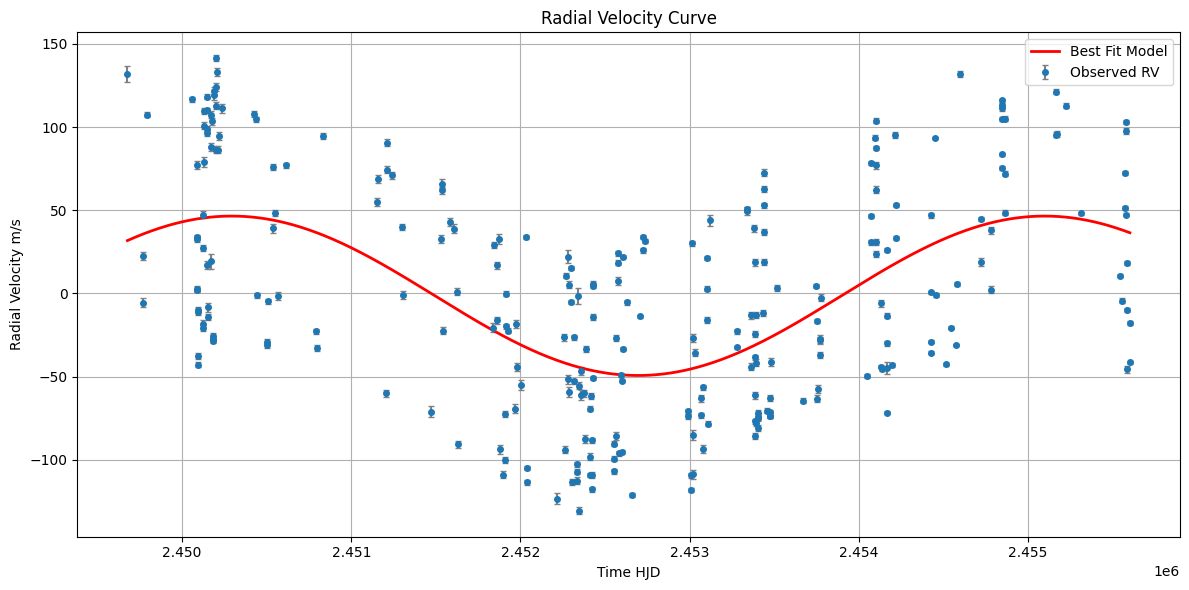

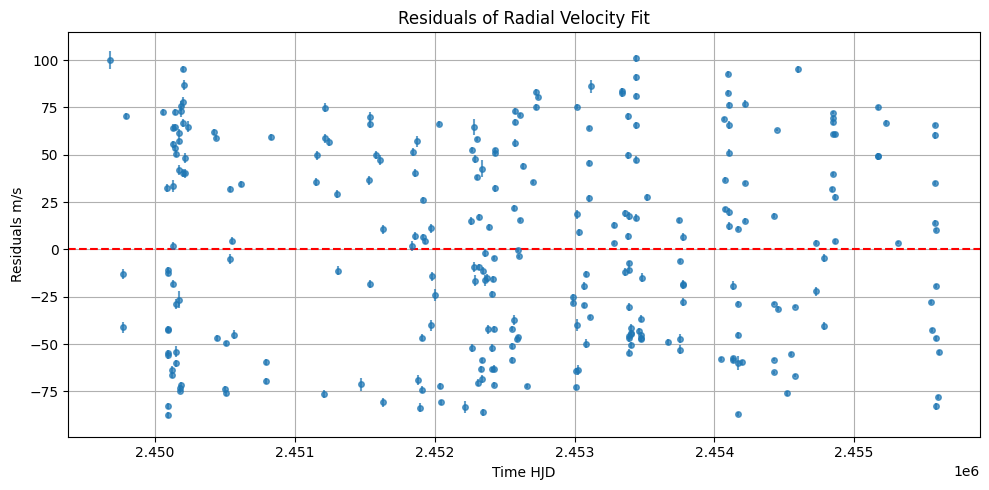

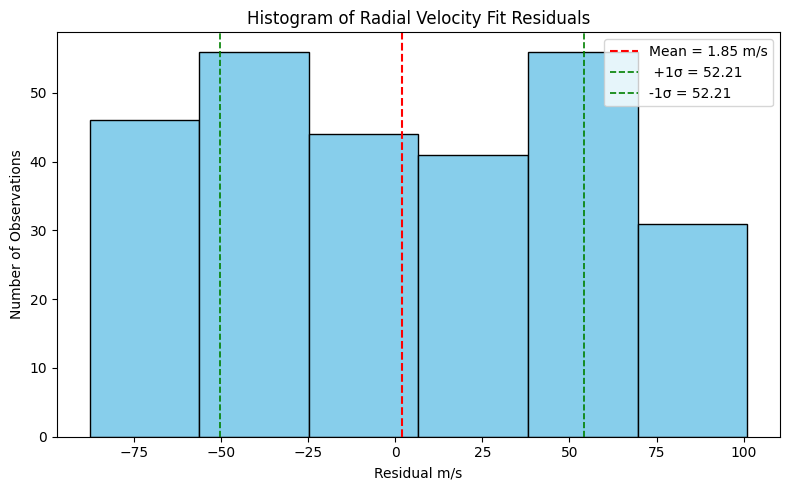

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Step 1: Load the data
data_text = """
2449676.0632,131.910003662,4.8400002 
2449767.77441,22.6000003815,2.5699999 
2449768.83203,-5.48999977112,2.6800001 
2449793.79785,107.309997559,1.52 
2450056.98828,116.669998169,1.6199999 
2450087.88184,77.2600021362,2.1600001 
2450088.91894,32.5999984741,1.64 
2450089.00586,33.7299995422,1.5599999 
2450089.77637,2.73000001907,1.61 
2450089.98633,2.24000000954,1.53 
2450090.74512,-9.72999954224,1.41 
2450090.89258,-11.1199998856,1.66 
2450091.84863,-37.6500015259,1.54 
2450091.96973,-42.75,1.59 
2450120.87243,-18.4400005341,2.2 
2450121.88866,-20.9599990845,1.7299999 
2450124.85765,27.3099994659,1.8599999 
2450125.77783,47.2099990845,2.0999999 
2450126.83752,79.0500030518,3.1199999 
2450127.85104,100.86000061,2.02 
2450128.86732,109.730003357,1.8599999 
2450144.71034,118.199996948,1.52 
2450144.85357,110.160003662,1.59 
2450145.625,99.0800018311,1.6999999 
2450145.76465,96.2300033569,1.6999999 
2450148.88742,17.0200004578,2.6400003 
2450150.74885,-14.3800001144,1.8300002 
2450152.66281,-8.21000003815,2.73 
2450168.74902,19.2999992371,4.5900002 
2450171.73959,87.8399963379,2.4300001 
2450172.68686,107.459999084,2.29 
2450173.72485,103.370002747,1.9 
2450179.73422,-28.6399993896,1.29 
2450180.68848,-27.2000007629,1.4899999 
2450181.63379,-25.3299999237,1.53 
2450186.73954,121.800003052,2.5899999 
2450187.68636,119.040000916,3.04 
2450199.68319,86.4700012207,2.02 
2450200.70104,112.790000916,2.1300001 
2450201.68663,124.019996643,2.51 
2450202.68868,141.460006714,1.7199999 
2450203.68772,132.990005493,2.54 
2450214.68668,86.4199981689,2.1700001 
2450215.67357,94.7200012207,2.55 
2450233.69028,111.230003357,2.9400001 
2450422.00586,107.879997253,1.58 
2450437.92852,104.599998474,1.2999998 
2450441.9541,-1.19000005722,1.5500001 
2450502.78136,-29.0900001526,1.4899999 
2450503.76303,-31.2999992371,1.29 
2450504.77366,-4.84999990463,1.26 
2450536.77162,39.0400009155,2.49 
2450537.7645,75.9300003052,1.7500001 
2450550.72661,48.3800010681,1.76 
2450563.71983,-1.49000000954,2.4400001 
2450614.69333,76.9199981689,1.6800001 
2450793.90234,-22.8299999237,1.5700002 
2450794.96191,-32.7400016785,1.59 
2450831.93164,94.5599975586,1.7800001 
2451153.0332,54.8800010681,2.29 
2451155.01856,68.8899993896,2.28 
2451206.87793,-60.0499992371,2.0599999 
2451212.92549,74.4700012207,2.27 
2451213.88293,90.6699981689,2.28 
2451242.74023,70.9300003052,2.1099999 
2451298.72157,39.9000015259,2.02 
2451305.70801,-0.980000019073,2.29 
2451469.05273,-71.1200027466,3.3799999 
2451532.99609,32.6199989319,2.3 
2451535.00684,66.0,2.5999997 
2451536.94922,62.0,1.9299999 
2451540.00781,-22.4099998474,2.1700001 
2451581.84883,42.9399986267,2.2 
2451607.82779,38.9199981689,2.53 
2451626.73438,1.08000004292,2.3099999 
2451629.80566,-90.6500015259,2.1500001 
2451840.04883,-20.5,2.73 
2451842.03582,29.0699996948,1.96 
2451860.05664,16.8199996948,2.1500001 
2451861.03711,-16.2000007629,2.0999999 
2451874.00586,32.8100013733,2.96 
2451880.01946,-93.6900024414,2.6400003 
2451895.00493,-108.88999939,2.3 
2451906.96312,-72.5500030518,2.04 
2451910.89618,-100.25,1.91 
2451913.96456,-19.8600006104,1.45 
2451914.9266,-0.0799999982119,1.53 
2451927.90889,-22.4799995422,1.5700002 
2451969.78803,-69.3700027466,2.7500002 
2451971.80977,-18.3199996948,2.5799999 
2451979.74933,-44.0900001526,2.52 
2452000.71484,-55.0299987793,3.04 
2452033.71044,33.8899993896,1.37 
2452040.69009,-104.940002441,1.45 
2452041.6994,-113.61000061,1.4299999 
2452217.04492,-123.480003357,3.2899997 
2452257.03439,-26.4300003052,2.0599999 
2452262.98773,-93.9400024414,1.9500002 
2452267.96362,10.7600002289,1.2400001 
2452278.93559,-51.6899986267,2.47 
2452281.98047,22.1399993896,4.1199999 
2452285.98783,5.13000011444,2.1500001 
2452287.95594,-59.1699981689,2.8299999 
2452298.90856,15.3240842819,0.9502338 
2452299.77417,-4.92000007629,1.1799999 
2452306.80667,-113.550003052,1.6800001 
2452315.80411,-26.3500003815,1.38 
2452316.85626,-52.9300003052,1.6 
2452333.81638,-107.099998474,1.5099999 
2452334.73047,-112.559997559,2.1900001 
2452335.78936,-102.730003357,1.4299999 
2452338.83203,-1.46000003815,4.71 
2452345.78535,-55.5600013733,2.04 
2452348.77603,-130.570007324,1.9200001 
2452359.81445,-46.6800003052,2.29 
2452360.69141,-60.9700012207,2.9000001 
2452375.73439,-60.0699996948,2.05 
2452380.69821,-87.5899963379,2.46 
2452388.68985,-33.4399986267,1.5500001 
2452408.71412,-109.230003357,1.35 
2452409.7121,-98.0699996948,2.0999999 
2452410.70428,-69.3300018311,1.59 
2452419.71506,-61.5900001526,1.6 
2452420.71259,-88.3000030518,1.38 
2452421.71169,-117.690002441,1.4299999 
2452422.72106,-109.199996948,1.77 
2452426.73142,-50.9000015259,1.3100001 
2452427.69703,-14.0500001907,1.9 
2452428.70336,4.30999994278,1.22 
2452429.70827,5.88999986649,1.2999998 
2452553.02973,-90.25,1.5700002 
2452554.0277,-99.3399963379,1.5 
2452554.99206,-106.989997864,1.6199999 
2452565.01999,-26.7399997711,1.61 
2452567.04981,-85.8799972534,2.53 
2452575.04492,7.38999986649,2.23 
2452576.04315,24.2199993134,1.53 
2452576.98474,18.5,1.6299999 
2452585.01747,-96.2099990845,1.28 
2452595.01118,-49.1599998474,1.09 
2452598.99109,-95.2600021362,1.04 
2452600.96715,-52.4700012207,0.84 
2452606.98584,21.9899997711,0.98 
2452608.96373,-33.4900016785,1.1799999 
2452631.93493,-5.25,1.5 
2452656.94906,-121.269996643,1.1900001 
2452705.75516,-13.8199996948,1.13 
2452722.74956,33.9599990845,1.42 
2452723.75683,25.9200000763,1.41 
2452737.69963,31.2800006866,1.17 
2452990.98926,-70.9800033569,1.7500001 
2452992.01973,-73.9499969482,1.41 
2453008.97305,-118.279998779,1.2400001 
2453009.82291,-109.370002747,1.2999998 
2453014.91699,30.1900005341,1.47 
2453018.88184,-26.6100006104,2.3099999 
2453020.90625,-84.9499969482,3.05 
2453021.88885,-108.760002136,2.5599999 
2453034.84961,-35.6500015259,1.9500002 
2453068.80437,-73.3499984741,1.53 
2453069.74609,-63.1699981689,2.22 
2453079.73859,-56.4199981689,1.61 
2453081.73731,-93.2399978638,2.4000001 
2453100.70337,-15.8000001907,1.7899998 
2453101.6739,2.8599998951,1.4299999 
2453102.72334,21.2800006866,1.1 
2453108.70748,-78.2099990845,1.26 
2453119.68654,43.9799995422,3.2499998 
2453282.03418,-22.8799991608,1.6199999 
2453283.02688,-32.3899993896,1.05 
2453337.93066,49.4700012207,2.3299999 
2453338.97882,50.4700012207,1.33 
2453362.93359,-44.0699996948,2.01 
2453363.90318,-13.1400003433,2.01 
2453383.88228,39.1199989319,1.9800001 
2453384.88244,18.6200008392,1.87 
2453385.86724,-24.2399997711,1.7800001 
2453386.84468,-38.5099983215,1.27 
2453387.87126,-61.2400016785,2.0799999 
2453388.83796,-85.5299987793,1.8599999 
2453389.81824,-76.9100036621,1.48 
2453390.91379,-77.7300033569,1.97 
2453391.95825,-41.5600013733,1.9200001 
2453392.78225,-13.1700000763,1.9 
2453402.88127,-72.0299987793,2.1500001 
2453403.89456,-74.9499969482,2.02 
2453404.86772,-80.7900009155,1.64 
2453405.87794,-74.3300018311,1.6999999 
2453436.73642,-11.7100000381,2.04 
2453437.78982,18.9799995422,1.87 
2453438.73703,37.0099983215,1.87 
2453439.74637,62.5699996948,1.7899998 
2453440.7431,72.5999984741,1.9 
2453441.82095,52.8899993896,1.48 
2453460.69637,-70.4800033569,1.6299999 
2453475.6786,-63.1399993896,1.8300002 
2453476.68059,-71.5599975586,1.6299999 
2453477.68219,-73.4400024414,1.6899999 
2453478.68579,-73.4899978638,1.65 
2453479.67637,-41.1599998474,2.3 
2453516.69655,3.36999988556,1.87 
2453669.06331,-64.4000015259,1.7800001 
2453744.93382,4.38000011444,1.2400001 
2453752.9071,-16.5599994659,1.17 
2453755.87845,-63.1800003052,2.29 
2453756.84973,-57.3400001526,2.25 
2453773.7296,-28.1800003052,2.0999999 
2453773.81957,-27.5100002289,2.25 
2453773.96883,-36.9500007629,1.9299999 
2453774.80103,-2.58999991417,2.01 
2454050.02388,-49.5999984741,1.1 
2454072.02159,78.3700027466,1.0 
2454073.01428,46.3800010681,1.2999998 
2454073.95856,30.7099990845,1.33 
2454098.95179,93.6900024414,1.3200002 
2454100.01728,103.849998474,1.35 
2454101.97919,87.5299987793,1.36 
2454102.84959,76.9300003052,2.25 
2454103.00129,62.3600006104,1.97 
2454103.8473,31.0599994659,1.9399999 
2454103.93224,23.7399997711,2.03 
2454133.84118,-6.0,2.21 
2454134.81738,-43.9599990845,1.02 
2454135.75896,-45.2099990845,1.27 
2454165.7782,-71.6600036621,1.04 
2454166.70646,-44.7599983215,3.8099997 
2454167.67803,-30.1000003815,1.41 
2454168.80657,-13.3800001144,1.4899999 
2454169.84412,26.1900005341,1.37 
2454196.73046,-42.8100013733,1.22 
2454216.7786,95.0500030518,1.7899998 
2454219.74126,53.2999992371,1.13 
2454220.75738,33.4599990845,1.17 
2454426.06351,46.9399986267,1.34 
2454427.05271,0.569999992847,0.8 
2454428.0301,-29.0,0.79 
2454429.04614,-35.5999984741,0.79 
2454449.932,93.37550354,0.7520534 
2454457.97956,-0.680000007153,1.2 
2454517.7817,-42.7099990845,1.15 
2454547.8393,-20.6100006104,1.08 
2454574.71092,-31.1299991608,0.78 
2454578.74687,5.63000011444,0.98 
2454598.70674,131.690002441,1.85 
2454725.03198,18.8299999237,2.3199999 
2454726.02537,44.5200004578,1.23 
2454783.98942,2.1400001049,2.0999999 
2454784.98892,37.9099998474,2.0899999 
2454844.90482,75.5999984741,1.1900001 
2454846.02038,113.400001526,0.89 
2454846.95168,116.230003357,0.9299999 
2454847.89244,111.209999084,1.35 
2454848.88496,104.809997559,1.0700001 
2454849.83585,83.7200012207,0.9299999 
2454863.84482,104.980003357,1.4 
2454864.85968,72.0699996948,1.48 
2454865.86258,48.5800018311,1.48 
2455167.02476,95.4499969482,1.64 
2455167.99733,121.370002747,1.4899999 
2455172.01593,95.6299972534,1.8599999 
2455228.79089,112.830001831,1.4899999 
2455312.67241,48.25,0.95 
2455546.93183,10.6499996185,1.02 
2455554.96177,-4.28000020981,1.27 
2455576.88561,51.4900016785,1.2999998 
2455577.86121,72.4700012207,1.02 
2455578.76532,97.7200012207,1.88 
2455578.86419,102.930000305,1.03 
2455582.8289,47.3699989319,1.01 
2455583.87264,18.1700000763,1.0599999 
2455584.86735,-9.75,1.15 
2455585.89067,-45.7200012207,1.8300002 
2455602.8169,-41.4099998474,0.96 
2455603.80404,-17.9500007629,1.09 
"""  

# Step 2: Parse the data into lists
time = []
rv = []
rv_err = []

for line in data_text.strip().split("\n"):
    t, v, e = map(float, line.strip().split(","))
    time.append(t)
    rv.append(v)
    rv_err.append(e)

# Step 3: Plot the data with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(time, rv, yerr=rv_err, fmt='o', markersize=3, ecolor='gray', capsize=2)
plt.xlabel("Time [HJD]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("Radial Velocity Curve for HD 75732")
plt.grid(True)

# Step 4: Save the figure as a PDF
plt.savefig("hd75732_rv_plot.pdf")

# Step 5: Show the plot
plt.show()

# Step 6: Oscillatory function describing variations of the rv data
def rv_model(t, K, P, phi, gamma):
    return K * np.sin(2 * np.pi * t / P + phi) + gamma

# Step 7: Initial guess for parameters
initial_guess = [1000, 4000, 0, 0]

# Step 8: Fitting model to data with uncertainties then extract
popt, pcov = curve_fit(rv_model, time, rv, sigma=rv_err, p0=initial_guess, absolute_sigma=True)
K_fit, P_fit, phi_fit, gamma_fit = popt

# Step 9: Curve from model
t_fit = np.linspace(np.min(time), np.max(time), 1000)
rv_fit = rv_model(t_fit, *popt)

# Step 10: Plot data and fitted model
plt.figure(figsize=(12, 6))
plt.errorbar(time, rv, yerr=rv_err, fmt='o', markersize=4, ecolor='gray', capsize=2, label='Observed RV')
plt.plot(t_fit, rv_fit, 'r-', label='Best Fit Model', linewidth=2)
plt.xlabel("Time HJD")
plt.ylabel("Radial Velocity m/s")
plt.title("Radial Velocity Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("hd75732_rv_model_fit.pdf")
plt.show()

# Step 11: Compute residuals
rvmod = rv_model(np.array(time), *popt)
residuals = rv - rvmod

# Step 12: Plot residuals vs time
plt.figure(figsize=(10, 5))
plt.errorbar(time, residuals, yerr=rv_err, fmt='o', markersize=4, label='Residuals', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Time HJD")
plt.ylabel("Residuals m/s")
plt.title("Residuals of Radial Velocity Fit")
plt.grid(True)
plt.tight_layout()
plt.savefig("hd75732_rv_residuals.pdf")
plt.show()

# Step 13: Histogram of residuals
residual_std = np.std(residuals)
mean_error = np.mean(rv_err)

# Step 14: Plot histogram
plt.figure(figsize=(8,5))
q25, q75 = np.percentile(residuals, [25, 75])
binwidth = 2 * (q75 - q25) * len(residuals) ** (-1/3)
bins = int((max(residuals) - min(residuals)) / binwidth)
plt.hist(residuals, bins=bins, color='skyblue', edgecolor='black')
plt.title("Histogram of Radial Velocity Fit Residuals")
plt.xlabel('Residual m/s')
plt.ylabel('Number of Observations')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {residuals.mean():.2f} m/s')
plt.axvline(residuals.mean() + residual_std, color='green', linestyle='dashed', linewidth=1.2, label=f' +1σ = {residual_std:.2f}')
plt.axvline(residuals.mean() - residual_std, color='green', linestyle='dashed', linewidth=1.2, label=f'-1σ = {residual_std:.2f}')
plt.legend()
plt.tight_layout()
plt.savefig("hd75732_rv_residuals_histogram.pdf")
plt.show()